아이리스 품종을 분류하고 예측하는 딥러닝

다중 클래스 분류 문제임 클래스 3개: 세토사, 버시컬러, 버지니카

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder  # 텍스트 형식의 클래스를 숫자로 변환하는데 쓸거임

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager   # 한글 사용
import numpy as np
import tensorflow as tf

In [4]:
df = pd.read_csv('D:\\ai\\Software Practical Use and Coding\\13\\iris.csv', names = ["꽃받침길이", "꽃받침넓이", "꽃잎길이", "꽃잎넓이", "종류"])

In [5]:
df

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,종류
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


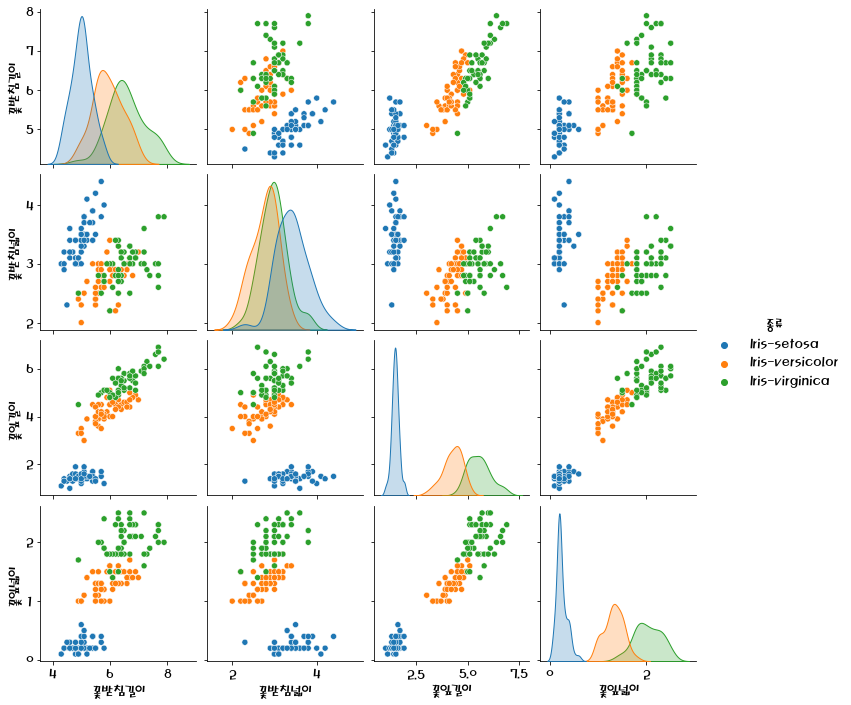

In [6]:
#한글 폰트 설정
font_path = "C:\\Windows\\Fonts\\HMKMMAG.TTF"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=14) 

#seaborn에서 제공하는 pairplot() 함수 사용
sns.pairplot(df, hue='종류')  #상관도 그래프
#sns.pairplot(df, hue='종류', palette="husl")

plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   150 non-null    float64
 1   꽃받침넓이   150 non-null    float64
 2   꽃잎길이    150 non-null    float64
 3   꽃잎넓이    150 non-null    float64
 4   종류      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['종류'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.head(5)

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,종류
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

딥러닝 위해서 속성이랑 클래스로 데이터 분리

In [11]:
# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

텍스트 형식 클래스를 숫자로 변환

In [12]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [13]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

숫자로 변환된 클래스를 ONE-HOT 인코딩

In [14]:
Y_encoded = tf.keras.utils.to_categorical(Y)  # ONE-HOT 인코딩으로 변환 

In [15]:
Y_encoded  # ONE-HOT 인코딩으로 변환된 값 출력 

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
len(Y_encoded)

150

데이터셋을 학습데이터셋과 테스트 데이터셋으로 분리

In [18]:
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

from sklearn.model_selection import train_test_split 

# 학습 데이터셋 : 70%, 테스트 데이터셋 : 30% / 클래스는 원핫인코딩된 Y_encoded 를 사용
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=seed)

In [19]:
len(X_train)   # 학습 데이터셋 70% : 105개

105

In [20]:
len(X_test)   # 테스트 데이터셋 305 : 45개  (validation data)

45

모델 설정 : Activation function으로 softmax를 활용한 모델 설정

In [21]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 활성화 함수 softmax 사용

모델 컴파일 : loss='categorical_crossentropy'를 사용한 모델 컴파일

In [23]:
# sigmoid의 경우 : model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

# softmax의 경우 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<strong>참고 : model.fit() 및 model.evaluate() 옵션 중에서</strong><br>
<strong>출력 결과 내용 제어를 위한 기능</strong><br>
● verbose 부분<br>
0 : 아무 것도 출력하지 않음<br>
1 : 진행 바 [==============================] 형태를 출력<br>
2 : epoch당 loss, accuracy, val_loss, val_accuracy 정보를 출력<br>
<br>
<strong>출력 결과에서 의미하는 용어</strong><br>
loss : 학습 데이터셋의 loss<br>
accuracy : 학습 데이터셋의 accuracy<br>

val_loss : 테스트 데이터셋의 loss<br>
val_accuracy : 테스트 데이터셋의 loss<br>

학습 데이터셋으로 실행하고, 테스트 데이터셋으로 검증

In [24]:
# 학습 데이터셋 105개를 학습에 사용하고, 테스트 데이터셋 45개는 검증을 위한 테스트에 사용한다.
# loss, accuracy, val_loss, val_accuracy 정보를 그래프 그리기 위해서 hist에 할당 
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=2)

# 만약 테스트 데이터셋으로 검증하는 부분을 생략하고, 학습 데이터셋으로 학습만 시킨다면 아래와 같이 코딩
#hist = model.fit(X_train, Y_train, epochs=50, batch_size=1)  

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 - 1s - loss: 1.8832 - accuracy: 0.3714 - val_loss: 2.2077 - val_accuracy: 0.2444
Epoch 2/100
105/105 - 0s - loss: 1.7914 - accuracy: 0.3714 - val_loss: 2.0968 - val_accuracy: 0.2444
Epoch 3/100
105/105 - 0s - loss: 1.7113 - accuracy: 0.3714 - val_loss: 1.9886 - val_accuracy: 0.2444
Epoch 4/100
105/105 - 0s - loss: 1.6275 - accuracy: 0.3714 - val_loss: 1.8887 - val_accuracy: 0.2444
Epoch 5/100
105/105 - 0s - loss: 1.5543 - accuracy: 0.3714 - val_loss: 1.7942 - val_accuracy: 0.2444
Epoch 6/100
105/105 - 0s - loss: 1.4850 - accuracy: 0.3714 - val_loss: 1.7042 - val_accuracy: 0.2444
Epoch 7/100
105/105 - 0s - loss: 1.4156 - accuracy: 0.3714 - val_loss: 1.6217 - val_accuracy: 0.2444
Epoch 8/100
105/105 - 0s - loss: 1.3584 - accuracy: 0.3714 - val_loss: 1.5447 - val_accuracy: 0.2444
Epoch 9/100
105/105 - 0s - loss: 1.2985 - accuracy: 0.3714 - val_loss: 1.4749 - val_accuracy: 0.2444
Epoch 10/100
105/105 - 0s - loss: 1.2505 - acc

Epoch 81/100
105/105 - 0s - loss: 0.5316 - accuracy: 0.6952 - val_loss: 0.5653 - val_accuracy: 0.6000
Epoch 82/100
105/105 - 0s - loss: 0.5281 - accuracy: 0.7048 - val_loss: 0.5588 - val_accuracy: 0.6000
Epoch 83/100
105/105 - 0s - loss: 0.5243 - accuracy: 0.7143 - val_loss: 0.5538 - val_accuracy: 0.6222
Epoch 84/100
105/105 - 0s - loss: 0.5204 - accuracy: 0.7333 - val_loss: 0.5510 - val_accuracy: 0.6222
Epoch 85/100
105/105 - 0s - loss: 0.5167 - accuracy: 0.7238 - val_loss: 0.5495 - val_accuracy: 0.6222
Epoch 86/100
105/105 - 0s - loss: 0.5131 - accuracy: 0.7048 - val_loss: 0.5477 - val_accuracy: 0.6222
Epoch 87/100
105/105 - 0s - loss: 0.5095 - accuracy: 0.7048 - val_loss: 0.5455 - val_accuracy: 0.6222
Epoch 88/100
105/105 - 0s - loss: 0.5061 - accuracy: 0.7048 - val_loss: 0.5422 - val_accuracy: 0.6222
Epoch 89/100
105/105 - 0s - loss: 0.5028 - accuracy: 0.7238 - val_loss: 0.5360 - val_accuracy: 0.6222
Epoch 90/100
105/105 - 0s - loss: 0.4989 - accuracy: 0.7524 - val_loss: 0.5317 - v

In [25]:
# 모델 평가

a,b = model.evaluate(x=X_test, y=Y_test, verbose=0) # 45개의 테스트 데이터셋 결과 
print("Evaluate with test dataset : Loss = {:.4f}".format(a))      # 테스트 데이터셋의 loss 
print("Evaluate with test dataset : Accuracy = {:.4f}".format(b))  # 테스트 데이터셋의 accuracy

Evaluate with test dataset : Loss = 0.4893
Evaluate with test dataset : Accuracy = 0.7778


In [26]:
# 학습 모델 요약 정보
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


<strong>학습 결과 시각화</strong>

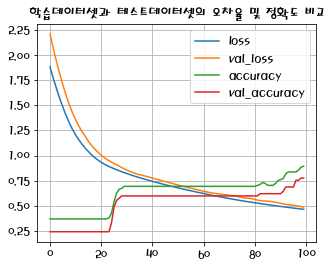

In [27]:
plt.rc('font', family=font_name, size=12) 
plt.figure(figsize=(5,4))
plt.title('학습데이터셋과 테스트데이터셋의 오차율 및 정확도 비교', fontsize=14)
# 위에서 아래와 같이 모델을 실행했었다. 
# 학습 데이터셋 105개를 학습에 사용하고, 테스트 데이터셋 45개는 검증을 위한 테스트에 사용한다.
# loss, accuracy, val_loss, val_accuracy 정보를 그래프 그리기 위해서 hist에 할당
# hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=2)
# loss, accuracy, val_loss, val_accuracy 정보를 획득한 상태 

plt.plot(hist.history['loss'])      # 학습 데이터셋의 loss   -> loss 
plt.plot(hist.history['val_loss'])  # 테스트 데이터셋의 loss -> val_loss

plt.plot(hist.history['accuracy'])      # 학습 데이터셋의 accuracy    -> accuracy 
plt.plot(hist.history['val_accuracy'])  # 테스트 데이터셋의 accuracy  -> val_accuracy 

plt.legend(['loss','val_loss','accuracy', 'val_accuracy' ])     # 범례
plt.grid()
plt.show()

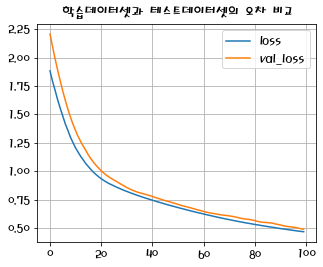

In [28]:
plt.figure(figsize=(5,4))
plt.title('학습데이터셋과 테스트데이터셋의 오차 비교', fontsize=14)
plt.plot(hist.history['loss'])      # 학습 데이터셋의 정확도
plt.plot(hist.history['val_loss'])  # 테스트 데이터셋의 정확도
plt.legend(['loss','val_loss']) # 범례
plt.grid()
plt.show()

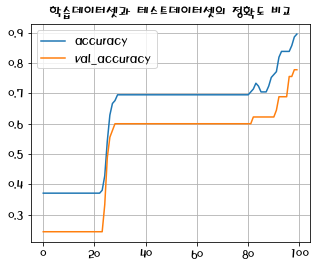

In [29]:
plt.figure(figsize=(5,4))
plt.title('학습데이터셋과 테스트데이터셋의 정확도 비교', fontsize=14)
plt.plot(hist.history['accuracy'])      # 학습 데이터셋의 정확도
plt.plot(hist.history['val_accuracy'])  # 테스트 데이터셋의 정확도
plt.legend(['accuracy','val_accuracy']) # 범례
plt.grid()
plt.show()

<strong>아이리스 품종 예측 : model.predict_classes를 활용한 임의의 데이터를 넣어서 아이리스 품종을 예측</strong>

unique()[model.predict_classes(속성)] : softmax 및 ONE-HOT 인코딩에 적합한 예측

In [31]:
test_iris = np.array([[5, 2.9, 1, 0.2]])
# predict_classes -> softmax 및 ONE-HOT인코딩에 적합한 예측

print("예측된 품종 : {}".format(df['종류'].unique()[model.predict_classes(test_iris)])) 

예측된 품종 : ['Iris-setosa']


In [32]:
test_iris = np.array([[7, 3.0, 5, 1.4]])
# predict_classes -> softmax 및 ONE-HOT인코딩에 적합한 예측

print("예측된 품종 : {}".format(df['종류'].unique()[model.predict_classes(test_iris)])) 

예측된 품종 : ['Iris-virginica']
